# CBP EDA

In [ ]:
import scipy.io
import numpy as np
import pandas as pd

file_path = "/Users/anitaiotti/Desktop/internship DynCL/PainDataChronicBackPain.mat"
mat_contents = scipy.io.loadmat(file_path)

def explore_mat_structure(mat_contents):
    print("Keys in the .mat file:")
    data_keys = [key for key in mat_contents.keys() if not key.startswith('__')]
    print(f"Data variables: {data_keys}")
    
    print("\nStructure of each variable:")
    for key in data_keys:
        value = mat_contents[key]
        print(f"\n{key}:")
        print(f"  Type: {type(value)}")
        print(f"  Shape: {value.shape if hasattr(value, 'shape') else 'N/A'}")
        print(f"  Data type: {value.dtype if hasattr(value, 'dtype') else 'N/A'}")

def convert_to_dataframe(array, var_name):
    if len(array.shape) == 2:
        df = pd.DataFrame(array)
        print(f"\nConverted {var_name} to DataFrame with shape {df.shape}")
        print(df.head()) 
        return df
    elif len(array.shape) == 1:
        df = pd.DataFrame(array, columns=[var_name])
        print(f"\nConverted {var_name} to DataFrame with shape {df.shape}")
        print(df.head())
        return df
    else:
        print(f"Cannot convert {var_name} with shape {array.shape} to DataFrame")
        return None

def run_mat_file_eda():
    explore_mat_structure(mat_contents)
    data_keys = [key for key in mat_contents.keys() if not key.startswith('__')]
    
    for key in data_keys:
        value = mat_contents[key]

        if isinstance(value, np.ndarray):
            _ = convert_to_dataframe(value, key)
        else:
            print(f"\n{key} is not a numpy array, skipping detailed analysis.")

if __name__ == "__main__":
    run_mat_file_eda()



Keys in the .mat file:
Data variables: ['AMP', 'SLP', 'None', 'aSLP', 'fmridata']

Structure of each variable:

AMP:
  Type: <class 'numpy.ndarray'>
  Shape: (36, 74066)
  Data type: float32

SLP:
  Type: <class 'numpy.ndarray'>
  Shape: (36, 74066)
  Data type: float32

None:
  Type: <class 'scipy.io.matlab._mio5_params.MatlabOpaque'>
  Shape: (1,)
  Data type: [('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')]

aSLP:
  Type: <class 'numpy.ndarray'>
  Shape: (36, 74066)
  Data type: float32

fmridata:
  Type: <class 'numpy.ndarray'>
  Shape: (408, 74066)
  Data type: float32

Converted AMP to DataFrame with shape (36, 74066)
      0         1         2         3         4         5         6      \
0 -1.710360 -0.095602  0.732726  5.186329  1.725520  3.154810  5.377257   
1 -1.322127  1.101648 -0.033359  6.125499  1.734325  3.147894  5.383342   
2 -0.766725  2.176533 -0.899761  7.054698  1.743235  3.141104  5.386603   
3 -0.035631  3.147122 -1.726422  7.811177  1.752249  3.134442  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [ ]:
def perform_eda(df, var_name):
    if df is None:
        return
    print(f"\nQuick Summary for {var_name}:")
    print("\nData Info:")
    print(df.info())
    print("\nQuantile Summary:")
    print(df.quantile([0.05, 0.25, 0.5, 0.75, 0.95]))
    total_missing = df.isnull().sum().sum() # missing values
    print(f"\nTotal Missing Values: {total_missing}")
    print("\nFirst 5 Rows:")
    print(df.head())

# Main
def run_mat_file_eda(_=None):
    mat_contents = scipy.io.loadmat(file_path)
    if mat_contents is None:
        return

    explore_mat_structure(mat_contents)

    data_keys = [key for key in mat_contents.keys() if not key.startswith('__')]
    for key in data_keys:
        value = mat_contents[key]

        if not isinstance(value, np.ndarray):
            print(f"\n{key} is not a numpy array, skipping detailed analysis.")
            continue

        df = convert_to_dataframe(value, key)
        if df is not None:
            perform_eda(df, key)
        else:
            print(f"\nCannot perform EDA on {key}. Shape: {value.shape}")
            try:
                if len(value.shape) <= 2:
                    print(value[:5])
                else:
                    print("Multidimensional array, showing first slice:")
                    print(value[0, :5, :5] if value.shape[1] > 5 and value.shape[2] > 5 else value[0])
            except:
                print("Cannot display sample data")

if __name__ == "__main__":
    run_mat_file_eda(file_path)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


Keys in the .mat file:
Data variables: ['AMP', 'SLP', 'None', 'aSLP', 'fmridata']

Structure of each variable:

AMP:
  Type: <class 'numpy.ndarray'>
  Shape: (36, 74066)
  Data type: float32

SLP:
  Type: <class 'numpy.ndarray'>
  Shape: (36, 74066)
  Data type: float32

None:
  Type: <class 'scipy.io.matlab._mio5_params.MatlabOpaque'>
  Shape: (1,)
  Data type: [('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')]

aSLP:
  Type: <class 'numpy.ndarray'>
  Shape: (36, 74066)
  Data type: float32

fmridata:
  Type: <class 'numpy.ndarray'>
  Shape: (408, 74066)
  Data type: float32

Converted AMP to DataFrame with shape (36, 74066)
      0         1         2         3         4         5         6      \
0 -1.710360 -0.095602  0.732726  5.186329  1.725520  3.154810  5.377257   
1 -1.322127  1.101648 -0.033359  6.125499  1.734325  3.147894  5.383342   
2 -0.766725  2.176533 -0.899761  7.054698  1.743235  3.141104  5.386603   
3 -0.035631  3.147122 -1.726422  7.811177  1.752249  3.134442  

In [ ]:
none_var = mat_contents.get('None', None)
print(f"Type: {type(none_var)}")
print(f"Contents:\n{none_var}")

Type: <class 'scipy.io.matlab._mio5_params.MatlabOpaque'>
Contents:
[(b'ssession', b'MCOS', b'nominal', array([[3707764736],
        [         2],
        [         1],
        [         1],
        [         2],
        [         1]], dtype=uint32))                   ]


### Chronic Back Pain (CBP) Dataset Structure

**Available variables:**
- `AMP`: Pain intensity (amplitude), temporally shifted
- `SLP`: Change in pain intensity (slope)
- `aSLP`: Decision/motor-related confounds
- `fmridata`: fMRI activity (parcellated into 408 brain regions)
- `None`: MATLAB obj (unused placeholder)

## Adding Subject and Session data w/ Excel file

In [ ]:
import scipy.io
import numpy as np
import pandas as pd

file_path = "/Users/anitaiotti/Desktop/internship DynCL/PainDataChronicBackPain.mat"
mat_contents = scipy.io.loadmat(file_path)

amp = mat_contents['AMP']
slp = mat_contents['SLP']
aslp = mat_contents['aSLP']
fmridata = mat_contents['fmridata']

subject_session_mapping = {
    'R004': [1, 2, 3, 4],
    'R005': [2, 3, 4, 5],
    'R006': [1, 2, 3, 4],
    'R007': [1, 2, 3, 4],
    'R008': [1, 2, 3, 4],
    'R009': [1, 2, 4, 5],
    'R010': [1, 2, 3, 4],
    'R012': [1, 2, 3, 4],
    'R014': [1, 2, 3, 4],
    'R015': [1, 2, 3, 4],
    'R016': [2, 3, 4],   # Missing session 1
    'R017': [2, 3, 4, 5],
    'R018': [1, 2, 3, 4],
    'R019': [1, 2, 3, 4],
    'R020': [1, 2, 3, 4],
    'R021': [1, 2, 3, 4],
    'R022': [2, 3, 4],   # Missing session 1
    'R023': [1, 3, 4, 5],
    'R025': [1, 2, 3, 4],
    'R026': [1, 2, 3, 4]
}

subject_list = list(subject_session_mapping.keys())

subject_ids = []
session_ids = []
normal_session_length = 950
total_samples = fmridata.shape[1]  # 74066 samples

current_idx = 0

for subj in subject_list:
    sessions = subject_session_mapping[subj]
    for sess in sessions:
        if current_idx >= total_samples:
            break

        length = normal_session_length

        #  session may be shorter
        if current_idx + length > total_samples:
            length = total_samples - current_idx

        subject_ids.extend([subj] * length)
        session_ids.extend([sess] * length)

        current_idx += length

subject_ids = np.array(subject_ids)
session_ids = np.array(session_ids)

assert len(subject_ids) == total_samples, f"Subject array length mismatch: {len(subject_ids)}"
assert len(session_ids) == total_samples, f"Session array length mismatch: {len(session_ids)}"

amp_df = pd.DataFrame(amp.T)
slp_df = pd.DataFrame(slp.T)
aslp_df = pd.DataFrame(aslp.T)
fmri_df = pd.DataFrame(fmridata.T)

full_df = pd.concat([
    pd.DataFrame({'Subject': subject_ids, 'Session': session_ids}),
    amp_df.add_prefix('AMP_'),
    slp_df.add_prefix('SLP_'),
    aslp_df.add_prefix('aSLP_'),
    fmri_df.add_prefix('fMRI_')
], axis=1)

print(f"Final dataset shape: {full_df.shape}")
print(full_df.head())


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


Final dataset shape: (74066, 518)
  Subject  Session     AMP_0     AMP_1     AMP_2     AMP_3     AMP_4  \
0    R004        1 -1.710360 -1.322127 -0.766725 -0.035631  0.823763   
1    R004        1 -0.095602  1.101648  2.176533  3.147122  4.048497   
2    R004        1  0.732726 -0.033359 -0.899761 -1.726422 -2.360429   
3    R004        1  5.186329  6.125499  7.054698  7.811177  8.315646   
4    R004        1  1.725520  1.734325  1.743235  1.752249  1.761367   

      AMP_5     AMP_6     AMP_7  ...  fMRI_398  fMRI_399  fMRI_400  fMRI_401  \
0  1.686625  2.375102  2.758376  ...  3.367837  3.475237 -2.194928  1.877142   
1  4.787866  5.260774  5.519557  ...  8.823385  4.578340  3.760048  4.892106   
2 -2.756884 -3.045416 -3.400434  ...  7.847021  7.677726  0.044441  5.770524   
3  8.647096  8.915797  9.098438  ... -9.822039 -7.973587  0.798883 -3.720834   
4  1.770591  1.779921  1.789357  ... -5.840112 -1.918030 -0.026135 -4.360692   

    fMRI_402  fMRI_403  fMRI_404  fMRI_405  fMRI_406

Checking that the values match in reconstructed + og sessionless and subjectless dataset:

In [ ]:
import numpy as np
import pandas as pd
import scipy.io

file_path = "/Users/anitaiotti/Desktop/internship DynCL/PainDataChronicBackPain.mat"
mat_contents = scipy.io.loadmat(file_path)
original_amp = amp
full_amp = full_df[[col for col in full_df.columns if col.startswith('AMP_')]].to_numpy()  #new amp
#  transpose og amp
original_amp_T = original_amp.T
are_same = np.allclose(original_amp_T, full_amp, atol=1e-6) # check if match
print(f"OG amp matches full amp? -> {are_same}")
print("\nFirst 5 rows, original AMP (transposed):")
print(pd.DataFrame(original_amp_T).head())
print("\nFirst 5 rows, new full_df AMP values:")
print(pd.DataFrame(full_amp).head())

if not are_same:
    print (":(")


OG amp matches full amp? -> True

First 5 rows, original AMP (transposed):
         0         1         2         3         4         5         6   \
0 -1.710360 -1.322127 -0.766725 -0.035631  0.823763  1.686625  2.375102   
1 -0.095602  1.101648  2.176533  3.147122  4.048497  4.787866  5.260774   
2  0.732726 -0.033359 -0.899761 -1.726422 -2.360429 -2.756884 -3.045416   
3  5.186329  6.125499  7.054698  7.811177  8.315646  8.647096  8.915797   
4  1.725520  1.734325  1.743235  1.752249  1.761367  1.770591  1.779921   

         7         8         9   ...        26        27        28        29  \
0  2.758376  2.867234  2.845914  ...  1.181838  2.011605  2.650153  2.968257   
1  5.519557  5.714704  5.901212  ... -4.365548 -4.064298 -3.580493 -2.846536   
2 -3.400434 -3.894857 -4.516159  ...  3.454453  3.948142  4.387644  4.783105   
3  9.098438  9.094168  8.848345  ...  3.341574  3.364915  3.386959  3.406140   
4  1.789357  1.798900  1.808550  ...  1.988134  1.999171  2.010181  2.0211

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


### Viusalizations

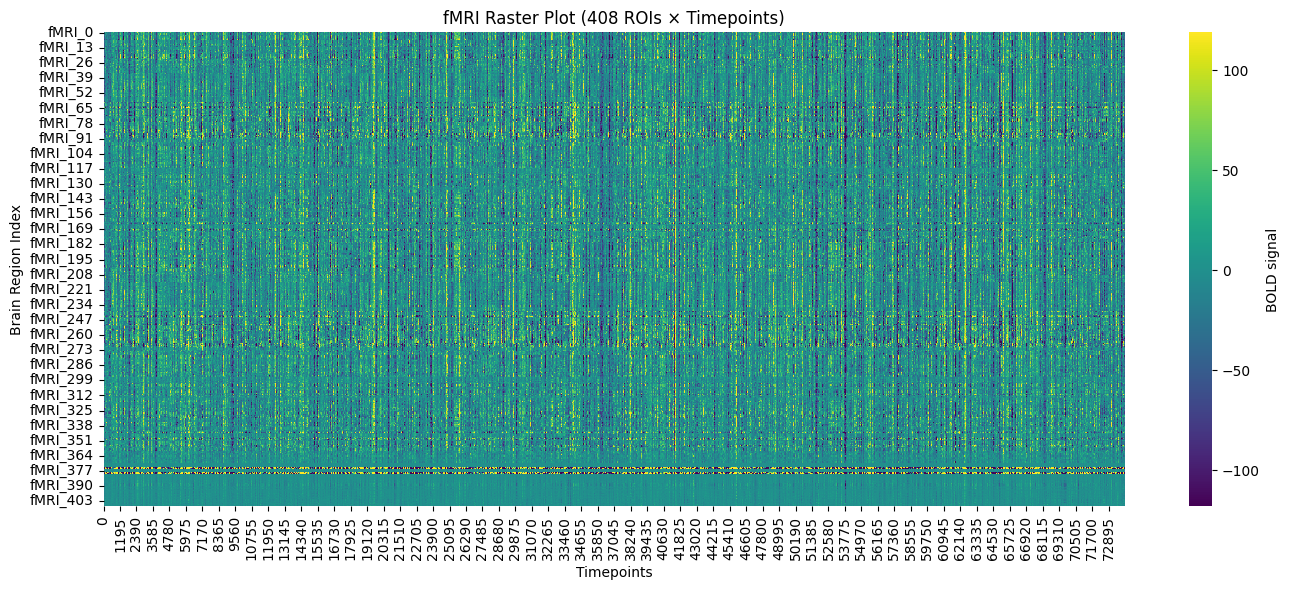

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_fmri_raster(full_df):
    fmri_cols = [col for col in full_df.columns if col.startswith('fMRI_')]
    fmridata_for_plot = full_df[fmri_cols].T  # transpose: now shape (408 regions, 74066 timepoints)

    vmin, vmax = np.percentile(fmridata_for_plot.values, [1, 99])
    plt.figure(figsize=(14, 6))
    sns.heatmap(
        fmridata_for_plot,
        cmap="viridis",
        cbar_kws={"label": "BOLD signal"},
        vmin=vmin, vmax=vmax
    )
    plt.title("fMRI Raster Plot (408 ROIs × Timepoints)") #all subjs all sessions
    plt.xlabel("Timepoints")
    plt.ylabel("Brain Region Index")
    plt.tight_layout()
    plt.show()

plot_fmri_raster(full_df)





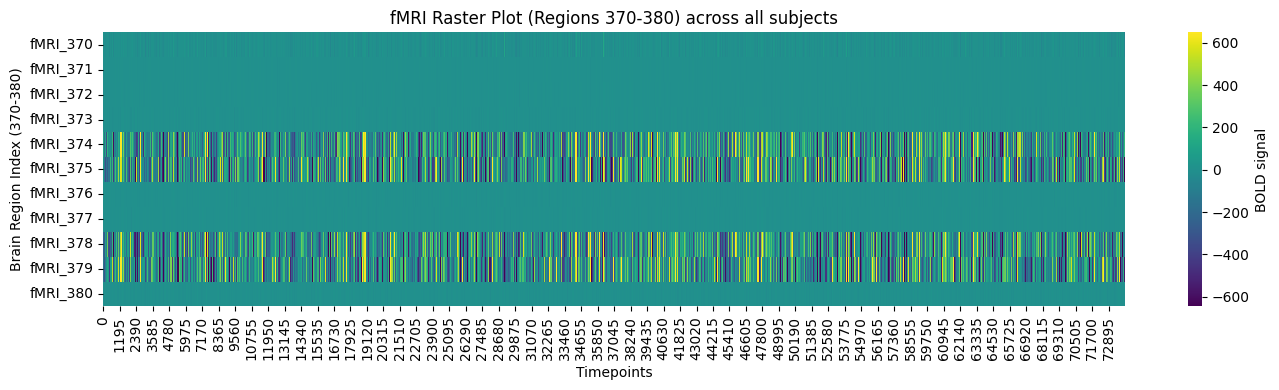

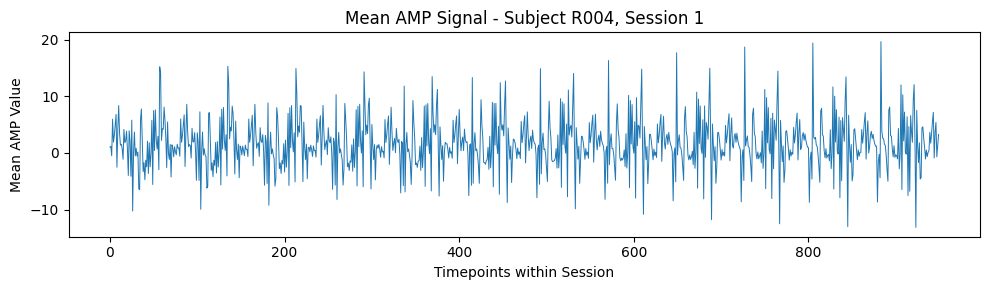

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. fMRI raster for ROis 370 to 380 only
def plot_fmri_raster_subset(full_df, region_start=370, region_end=380):
    fmri_cols = [f'fMRI_{i}' for i in range(region_start, region_end + 1)]
    fmridata_subset = full_df[fmri_cols].T  # shape (regions, timepoints)
    vmin, vmax = np.percentile(fmridata_subset.values, [1, 99]) # for contrast

    plt.figure(figsize=(14, 4))
    sns.heatmap(
        fmridata_subset,
        cmap="viridis",
        cbar_kws={"label": "BOLD signal"},
        vmin=vmin, vmax=vmax
    )
    plt.title(f"fMRI Raster Plot (Regions {region_start}-{region_end}) across all subjects")
    plt.xlabel("Timepoints")
    plt.ylabel("Brain Region Index (370-380)")
    plt.tight_layout()
    plt.show()

plot_fmri_raster_subset(full_df)

# AMP signla for one subj and one sess 
def plot_amp_for_one_subject_session(full_df, subject_id, session_id):
    amp_cols = [col for col in full_df.columns if col.startswith('AMP_')]
    filtered_df = full_df[(full_df['Subject'] == subject_id) & (full_df['Session'] == session_id)]
    mean_amp_signal = filtered_df[amp_cols].mean(axis=1)

    plt.figure(figsize=(10, 3))
    plt.plot(mean_amp_signal, linewidth=0.7)
    plt.title(f"Mean AMP Signal - Subject {subject_id}, Session {session_id}")
    plt.xlabel("Timepoints within Session")
    plt.ylabel("Mean AMP Value")
    plt.tight_layout()
    plt.show()

plot_amp_for_one_subject_session(full_df, subject_id="R004", session_id=1)
